<a href="https://colab.research.google.com/github/jdcneto/Fundamentals-of-Computer-Vision/blob/main/Cap_8_Morfologia_Matem%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pacotes necessários neste notebook

In [23]:
!pip install morph

In [24]:
from morph import *
import cv2
import numpy as np
from skimage import io
from mpl_toolkits.axes_grid1 import AxesGrid
#import matplotlib as mpl

import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [18*20, 12*20]

%matplotlib inline

### Importando a imagem 

In [25]:
import urllib.request
try:
  urllib.request.urlretrieve("https://github.com/jdcneto/Fundamentals-of-Computer-Vision/raw/main/dados/sample.png", "sample.png")
except:
    print('Uhm, algo deu errado!!')

### Imagem teste

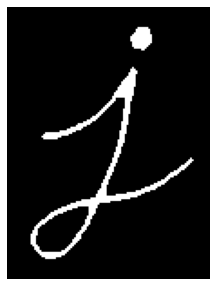

In [26]:
img = cv2.imread('sample.png', 0)
plt.figure(figsize=[5,5])
plt.imshow(img, cmap = 'gray')
plt.axis('off');

Um conceito importante na morfologia matemática é a definição de elemento estruturante. O elemento estruturante é um conjunto definido e conhecido (forma e tamanho), que é usado em uma operação com o conjunto da imagem para salientar determinado aspecto. Ele pode assumir várias formas dependendo do efeito a ser obtido e sua origem pode ser definida em qualquer ponto. Alguns elementos estruturantes são ilustrados abaixo:

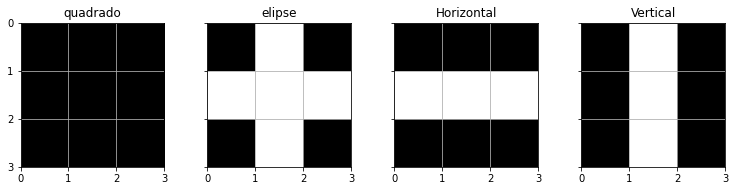

In [27]:
ee1 = np.ones((3,3), dtype=np.uint8)

ee2 = np.array([[0, 1, 0], 
                [1, 1, 1], 
                [0, 1, 0]], dtype=np.uint8)

ee3 = np.array([[0, 0, 0], 
                [1, 1, 1], 
                [0, 0, 0]], dtype=np.uint8)

ee4 = np.array([[0, 1, 0], 
                [0, 1, 0], 
                [0, 1, 0]], dtype=np.uint8)


fig5 = plt.figure()
fig5.set_figwidth(50)
fig5.set_figheight(120)

fig5.subplots_adjust(left=0.05, right=0.95)
grid5 = AxesGrid(fig5, 141, nrows_ncols=(1, 4), axes_pad=0.6)

titles5 = ['quadrado', 'elipse', 'Horizontal', 'Vertical']

ees = [ee1, ee2, ee3, ee4]

for i in range(len(titles5)):
    grid5[i].set_title(titles5[i])
    grid5[i].imshow(ees[i], cmap=plt.cm.binary_r)
    grid5[i].grid(True)
    axes = grid5[i]
    axes.set_xticks(np.arange(-.5, 3, 1))
    axes.set_yticks(np.arange(-.5, 3, 1))
    axes.set_xticklabels(np.arange(0, 3 + 1, 1))
    axes.set_yticklabels(np.arange(0, 3 + 1, 1))

# Algumas Operações Morfológicas

### Erosão

A erosão consiste em testar como a origem de um elemento estruturante com forma predefinida se encaixa dentro da imagem A. Onde aquela quantidade de pixels que não se encaixam em aquela direção do elemento estruturante são desativados da imagem. Para que o elemento estruturante caiba na imagem é necessário somente uma operação básica de translação no Espaço Euclidiano como segue: A translação de um conjunto  por um elemento B, denotado por B + z, é definido por:

$$A\ominus B = \{z| (B)_z \subseteq A\}$$   

Em outras palavras, essa equação indica que a erosão de A por B é o conjunto de todos os pontos z de forma que B, transladado por z, está contido em A.

In [28]:
# definindo o elemento estruturante
ee = np.ones((3,3),np.uint8)
erosion = cv2.erode(img, ee, iterations = 1)

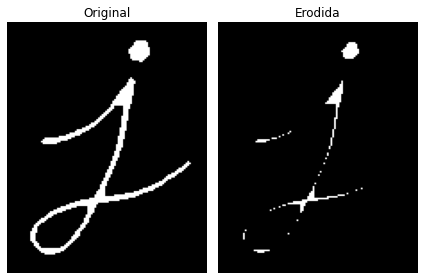

In [29]:
plt.subplot(1,2,1)
plt.imshow(img, 'gray', aspect="auto")
plt.title('Original'); plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(erosion, 'gray', aspect="auto")
plt.title('Erodida'); plt.axis('off')
plt.tight_layout()

### Aplicando erosão múltiplas vezes

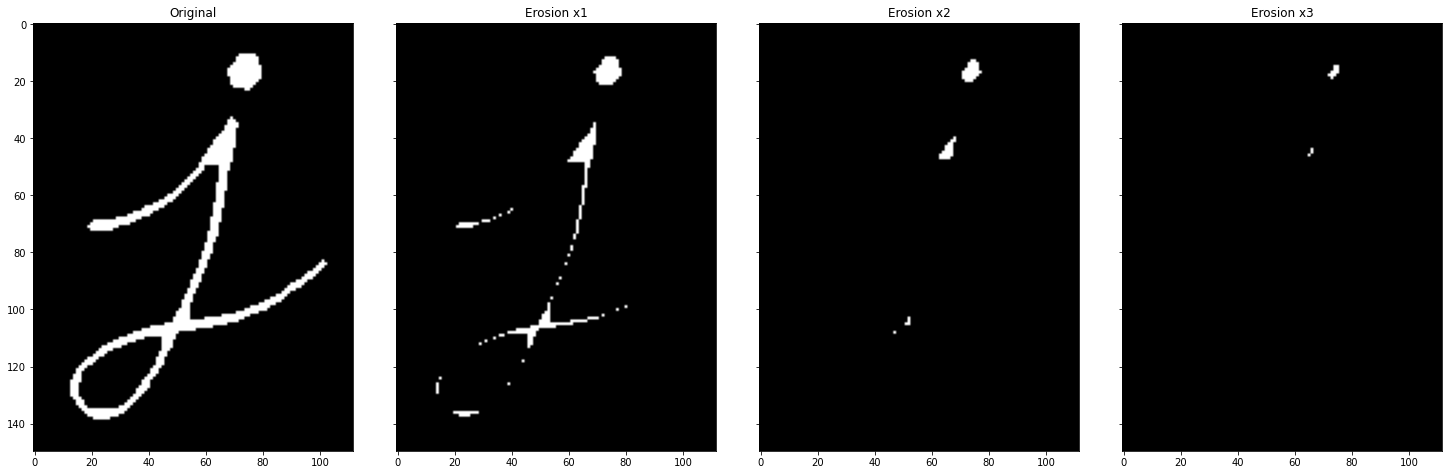

In [30]:
fig2 = plt.figure()
fig2.set_figwidth(100)
fig2.set_figheight(150)

fig2.subplots_adjust(left=0.05, right=0.95)
grid2 = AxesGrid(fig2, 141, nrows_ncols=(1, 4), axes_pad=0.6)

titles2 = ['Original', 'Erosion x1', 'Erosion x2', 'Erosion x3']


grid2[0].set_title(titles2[0])
grid2[0].imshow(img, cmap=plt.cm.binary_r)
for i in range(1, len(titles2)):
    grid2[i].set_title(titles2[i])
    result = cv2.erode(img, ee1, iterations = i)
    grid2[i].imshow(result, cmap=plt.cm.binary_r)

### Dilatação

A dilatação de A por B é o conjunto de todos os deslocamentos, z, de forma que B + z e A se sobreponham pelo menos por um elemento. Em outras palavras:  
$$ A \oplus B = \{z|(B)_z \cap A \ne \emptyset \}$$

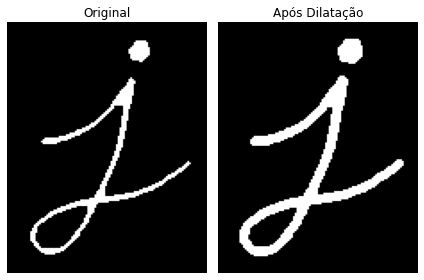

In [31]:
kernel = np.ones((3,3),np.uint8)
dila = cv2.dilate(img, kernel,iterations = 1)

plt.subplot(1,2,1)
plt.imshow(img, 'gray', aspect="auto")
plt.title('Original'); plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dila, 'gray', aspect="auto")
plt.title('Após Dilatação'); plt.axis('off')
plt.tight_layout()

### Abertura

A abertura binária da imagem X por um elemento estruturante B é definida como uma erosão seguida por uma dilatação da imagem usando mesmo elemento estruturante, como segue:
 
$$ A \circ B = (A\ominus B) A \oplus B $$

A abertura binária tem como principal objetivo eliminar as partículas indesejáveis sem modificar o tamanho das outras entidades. A abertura também pode ser aplicada como filtro para suavizar bordas ou cantos em imagens.

Exemplo

Adicionando um pouco de ruído na imagem 

In [32]:
def noise(image, prob):
    import random
    
    output = np.zeros(image.shape,np.uint8) 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 255
    return output+img

noise_img = noise(img, .05)

Agora vamos realizar a operação de abertura sobre a imagem ruidosa:

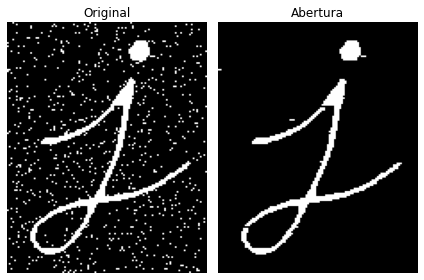

In [33]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, ee3)

plt.subplot(1,2,1)
plt.imshow(noise_img, 'gray', aspect="auto")
plt.title('Original'); plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(opening, 'gray', aspect="auto")
plt.title('Abertura'); plt.axis('off')
plt.tight_layout()

A abertura tem como efeitos:  
1) não devolve, de forma geral, o conjunto inicial;   
2) nivela os contornos pelo interior;   
3) separa as partículas;   
4) elimina as pequenas partículas inferiores em tamanho em relação ao elemento estruturante;   
5) as entidades restantes após a abertura ficam quase idénticas às originais.   

### Fechamento

O fechamento binário da imagem X por um elemento estruturante B é definida como uma dilatação seguida por uma erosão da imagem usando mesmo elemento estruturante, como segue:

$$  A \bullet B = (A\oplus B) A \ominus B $$

O fechamento binário tem como principal objetivo estabelecer a conexão entre objetos próximmos sem modificar o tamanho e a forma dos dos conjuntos. Ao contrário da abertura que suavisa as bicos das imagens, o fechamento de uma imagem suavisa bicos dentro do plano de fundo.

In [34]:
def noise2(image, prob):
    import random
    
    output = np.zeros(image.shape,np.uint8) 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 1
    return output+img

noise_img = noise2(img, .08)

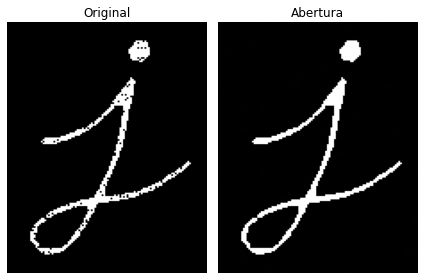

In [35]:
closing = cv2.morphologyEx(noise_img, cv2.MORPH_CLOSE, ee1)

plt.subplot(1,2,1)
plt.imshow(noise_img, 'gray', aspect="auto")
plt.title('Original'); plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(closing, 'gray', aspect="auto")
plt.title('Abertura'); plt.axis('off')
plt.tight_layout()

Os efeitos do fechamento são:   
1) suavizar fronteiras pelo exterior;   
2) preenche os buracos no interior das partículas inferior em tamanho em relação ao elemento estruturante;   
3) emenda partículas próximas;   
4) as entidades restantes após o fechamennto ficam quase idénticas às originais;   
5) o conjunto fechado é mais regular que o conjunto inicial;   
6) o conjunto fechado é menos rico en detalhes o conjunto inicial.   

## Mais uma operação interessante: O Gradiente Morfológico.

Gradiente é definido a partir das operações de Dilatação e Erosão. O processo destaca as transições entre os níveis de cinza (contornos) e o resultado da operação vai depender do elemento estruturante utilizado. Para mostrar contornos delgados e bem definidos, o ideal é utilizar um elemento pequeno; também é interessante notar que a simetria do elemento vai fazer com que o resultado da operação tenda a depender menos dos aspectos direcionais das bordas. 

Exemplo

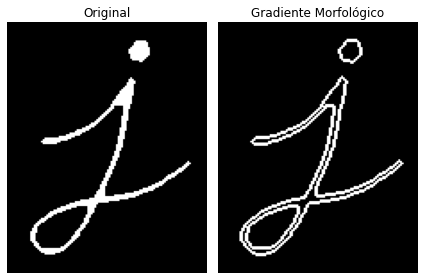

In [36]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, ee2)

plt.subplot(1,2,1)
plt.imshow(img, 'gray', aspect="auto")
plt.title('Original'); plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gradient, 'gray', aspect="auto")
plt.title('Gradiente Morfológico'); plt.axis('off')
plt.tight_layout()